# Corona Virus in the US

In [1]:
#data wrangle
import pandas as pd
import numpy as np
import json

#viz
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Aquire - deaths by county

In [66]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45880 entries, 0 to 45879
Data columns (total 6 columns):
date      45880 non-null object
county    45880 non-null object
state     45880 non-null object
fips      45254 non-null float64
cases     45880 non-null int64
deaths    45880 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 2.1+ MB


In [68]:
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


### Prepare

In [69]:
df.isnull().sum()

date        0
county      0
state       0
fips      626
cases       0
deaths      0
dtype: int64

In [70]:
df [df.fips.isnull()]

,date,county,state,fips,cases,deaths
416,2020-03-01,New York City,New York,NaN,1,0
418,2020-03-01,Unknown,Rhode Island,NaN,2,0
448,2020-03-02,New York City,New York,NaN,1,0
450,2020-03-02,Unknown,Rhode Island,NaN,2,0
482,2020-03-03,New York City,New York,NaN,2,0
...,...,...,...,...,...,...
45576,2020-04-09,Unknown,Utah,NaN,0,3
45592,2020-04-09,Unknown,Vermont,NaN,8,0
45596,2020-04-09,Unknown,Virgin Islands,NaN,46,1
45707,2020-04-09,Unknown,Virginia,NaN,0,40


In [71]:
df [df.fips.isnull()].county.value_counts()

Unknown          565
New York City     40
Kansas City       21
Name: county, dtype: int64

### Explore

In [72]:
states = df.groupby(df.state).sum()[["cases","deaths"]]

In [73]:
states["death_rate"] = round(states.deaths / states.cases * 100,2)

In [74]:
states.index.name = "state"

In [75]:
states.sort_values("death_rate", ascending=False)

,cases,deaths,death_rate
state,,,
Northern Mariana Islands,84,12,14.29
Washington,113284,5579,4.92
Vermont,6372,276,4.33
Kentucky,12891,531,4.12
Oklahoma,14075,567,4.03
Puerto Rico,5291,212,4.01
Michigan,179391,6964,3.88
Louisiana,146757,5435,3.70
Georgia,89246,3081,3.45


> The death rate is misleading, as it's based on the number of cases confirmed. This is a problem since there is insufficient testing nationwide, and it is very uncertain how many cases there actually is. 

#### Add population data

State population data obtained from https://worldpopulationreview.com/states/

In [76]:
with open('data.json') as f:
    data = json.load(f)

In [77]:
pop = pd.DataFrame(data['data'])

In [78]:
df_state = pd.merge(states,pop, left_on="state", right_on="State")

In [79]:
df_state.head()

,cases,deaths,death_rate,rank,State,Pop,Growth,Pop2018,Pop2010,growthSince2010,Percent,density
0,23056,491,2.13,24,Alabama,4908621,0.0042,4887871,4785448,0.0257,0.0147,96.9221
1,2509,43,1.71,49,Alaska,734002,-0.0047,737438,713906,0.0281,0.0022,1.2863
2,26722,608,2.28,14,Arizona,7378494,0.0288,7171646,6407774,0.1515,0.0221,64.9550
3,12270,192,1.56,33,Arkansas,3038999,0.0084,3013825,2921978,0.0400,0.0091,58.4030
4,191460,4413,2.30,1,California,39937489,0.0096,39557045,37320903,0.0701,0.1194,256.3727


> Retaining only the "Pop" column, as it's reflective of 2020. 

In [80]:
df_state = df_state[["cases","deaths","death_rate","State","Pop"]]
df_state.columns = [x.lower() for x in df_state.columns]

In [81]:
df_state = df_state.set_index("state")

In [82]:
df_state.head()

,cases,deaths,death_rate,pop
state,,,,
Alabama,23056,491,2.13,4908621
Alaska,2509,43,1.71,734002
Arizona,26722,608,2.28,7378494
Arkansas,12270,192,1.56,3038999
California,191460,4413,2.30,39937489


In [83]:
df_state.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, Alabama to Wyoming
Data columns (total 4 columns):
cases         52 non-null int64
deaths        52 non-null int64
death_rate    52 non-null float64
pop           52 non-null int64
dtypes: float64(1), int64(3)
memory usage: 2.0+ KB


Let's check out the rates by 1,0000 people. 

In [84]:
df_state["cases_p_1000"] = round(df_state.cases / df_state["pop"] * 1000, 2)
df_state["deaths_p_1000"] = round(df_state.deaths / df_state["pop"] * 1000, 2)

In [85]:
df_state.sort_values("cases_p_1000", ascending=False).head()

,cases,deaths,death_rate,pop,cases_p_1000,deaths_p_1000
state,,,,,,
New York,1561227,44734,2.87,19440469,80.31,2.30
New Jersey,425873,9974,2.34,8936574,47.66,1.12
Louisiana,146757,5435,3.70,4645184,31.59,1.17
Massachusetts,150638,2808,1.86,6976597,21.59,0.40
Connecticut,71105,2165,3.04,3563077,19.96,0.61


In [86]:
df_state.sort_values("deaths_p_1000", ascending=False).head()

,cases,deaths,death_rate,pop,cases_p_1000,deaths_p_1000
state,,,,,,
New York,1561227,44734,2.87,19440469,80.31,2.30
Louisiana,146757,5435,3.70,4645184,31.59,1.17
New Jersey,425873,9974,2.34,8936574,47.66,1.12
Washington,113284,5579,4.92,7797095,14.53,0.72
Michigan,179391,6964,3.88,10045029,17.86,0.69


> The `deaths_p_1000` is probably the number that is most reflective of the damage the virus is causing within a state. As all states have insufficient testing and it is truly unknown how much the virus has spread.  

### Texas Counties

In [87]:
df_texas = df [df.state == "Texas"]

In [88]:
df_texas.county.value_counts()

Bexar         58
Fort Bend     37
Harris        36
Collin        32
Montgomery    31
              ..
Sabine         1
McCulloch      1
Jack           1
Madison        1
Bandera        1
Name: county, Length: 176, dtype: int64

In [89]:
df_texas.date = pd.to_datetime(df_texas.date)
df_texas = df_texas.set_index("date")
df_texas = df_texas[["county","cases","deaths"]]

In [90]:
top_cases = df_texas.groupby("county").max().sort_values("cases",ascending=False).head(10).index

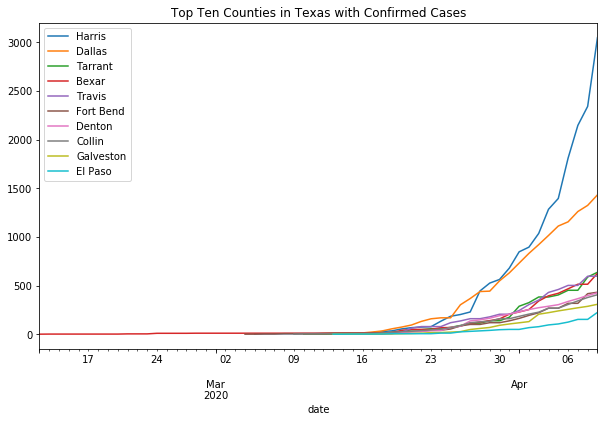

In [91]:
plt.figure(figsize=(10,6))

for x in top_cases:
    df_texas [df_texas.county == x]["cases"].plot()
plt.legend(labels=top_cases)
plt.title("Top Ten Counties in Texas with Confirmed Cases")
plt.show()